In [1]:
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from matplotlib import pyplot as plt

In [10]:
def Mandelbrot(maxiter, npoints):
    x = np.linspace(-2, 2, npoints)
    y = x*1j
    X, Y = np.meshgrid(x, y)
    complex_space = X + Y

    colors = np.zeros(np.shape(complex_space))
    ids = []
    for k, tab in enumerate(complex_space):
        for l, constant in enumerate(tab):
            z = 0
            for i in range(50):
                z = z**2 + constant
                if abs(z) > 4:
                    colors[k][l] = i
                    break
    plt.figure(figsize = (16,16))
    plt.scatter(np.real(complex_space), np.imag(complex_space), c=colors, cmap = 'hot')

In [25]:
def Mandelbrot_returnable(maxiter, npoints):
    x = np.linspace(-2, 2, npoints)
    y = x*1j
    X, Y = np.meshgrid(x, y)
    complex_space = X + Y

    colors = np.zeros(np.shape(complex_space))
    ids = []
    for k, tab in enumerate(complex_space):
        for l, constant in enumerate(tab):
            z = 0
            for i in range(50):
                z = z**2 + constant
                if abs(z) > 4:
                    colors[k][l] = i
                    break
    return colors

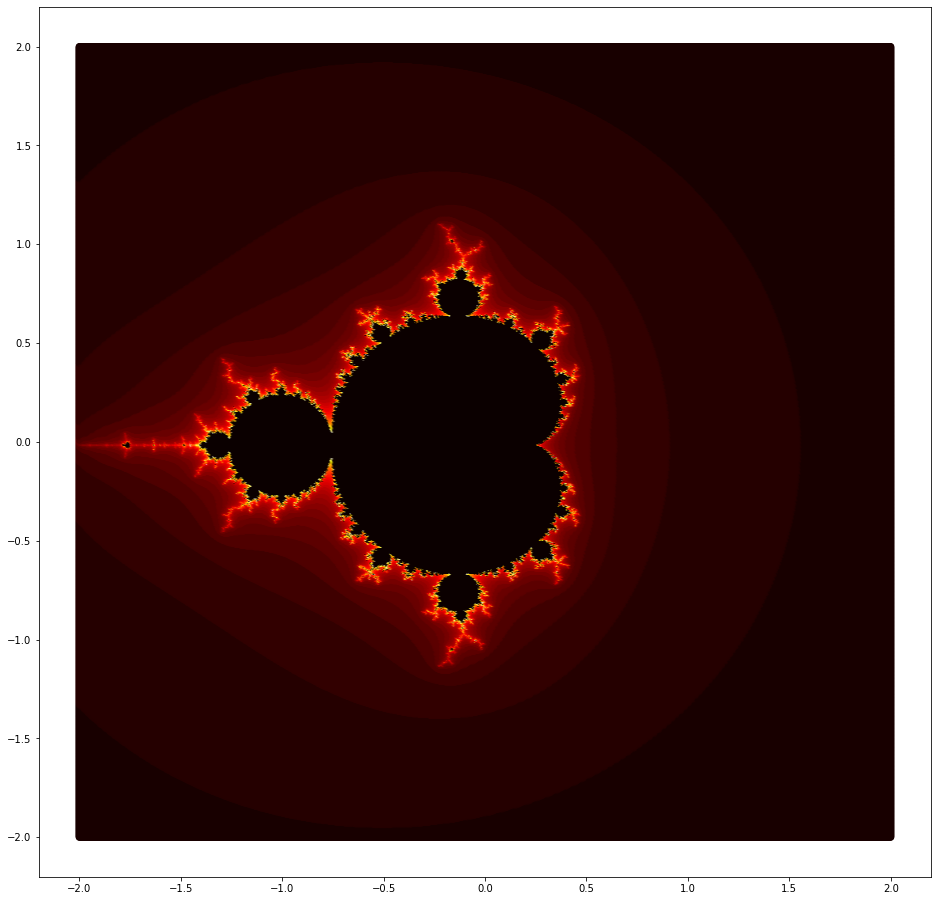

In [11]:
Mandelbrot(100, 1000)

In [43]:
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
def on_mouse_click(event):
    dist = 0
    if event.button == 1:
        dist = plot.get_xlim()
        dist = dist[1] - dist[0]
        dist/=4

    elif event.button == 3:
        dist = plot.get_xlim()
        dist = dist[1] - dist[0]
        dist*=2


    x = np.linspace(event.xdata - dist, event.xdata+dist, 250)
    y = np.linspace(event.ydata - dist, event.ydata+dist, 250)*1j
    X, Y = np.meshgrid(x, y)
    complex_space = X + Y
    plot.clear()

    colors = np.zeros(np.shape(complex_space))
    for k, tab in enumerate(complex_space):
        for l, constant in enumerate(tab):
            z = 0
            for i in range(100):
                z = z**2 + constant
                if abs(z) > 4:
                    colors[k][l] = i
                    break
    plot.scatter(np.real(complex_space), np.imag(complex_space), c=colors, cmap = 'hot')
    print(event.xdata, event.ydata, plot.get_xlim())
    canvas_widget.draw()



root = tk.Tk()
root.title("Dynamic Scatter Plot")

# Create a canvas widget
canvas = tk.Canvas(root, width=400, height=300)
canvas.pack()

# Create a figure for the plot
fig = Figure(figsize=(4, 3), dpi=300)
plot = fig.add_subplot(111)

#plot basic Mandelbrot set
x = np.linspace(-2, 2, 400)
y = x*1j
X, Y = np.meshgrid(x, y)
complex_space = X + Y
plot.scatter(np.real(complex_space), np.imag(complex_space), c = Mandelbrot_returnable(100, 400), cmap = 'hot')


# Create a FigureCanvasTkAgg to embed the plot in the canvas
canvas_widget = FigureCanvasTkAgg(fig, master=canvas)
canvas_widget.get_tk_widget().pack()

# Bind the motion event to the canvas
canvas_widget.mpl_connect('button_press_event', on_mouse_click)

# Start the tkinter main loop
root.mainloop()


-0.7759139784946241 0.004856512141280245 (-1.9859139784946243, 0.434086021505376)
-0.5911612903225811 0.602288447387785 (-1.2566612903225811, 0.07433870967741896)
-0.629803225806452 0.4196309786607797 (-0.9958282258064519, -0.263778225806452)
